--- Running CNN on MNIST ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9072 - loss: 0.2979
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9860 - loss: 0.0467
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9912 - loss: 0.0298
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9939 - loss: 0.0194
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9951 - loss: 0.0151

Evaluating CNN...
Test accuracy: 0.9901999831199646

Generating performance plot...


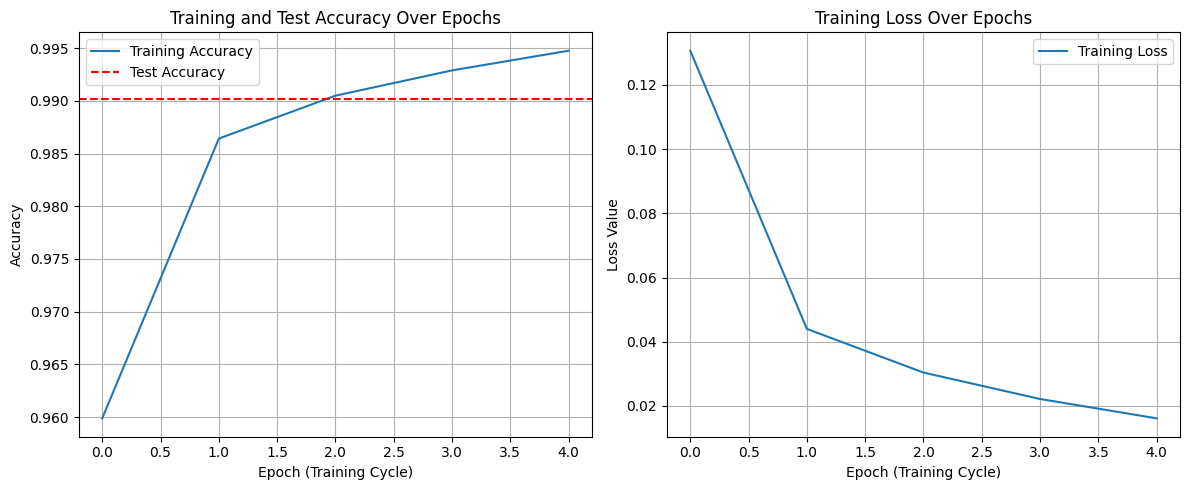

------------------------------------------------


In [15]:
#Convoluntional network model for MNIST Dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("--- Running CNN on MNIST ---")

#Loadng and training of MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values (0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# CNNs expect the input data to have a channel dimension.
# For grayscale images (like MNIST), the shape is changed from (samples, 28, 28) to (samples, 28, 28, 1).
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define the CNN model architecture
model = tf.keras.models.Sequential([
    # 1. Convolutional Layer: Extracts 32 features/filters using a 3x3 kernel.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # 2. Pooling Layer: Downsamples the feature maps, reducing dimensions while preserving key information.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # 3. Convolutional Layer: Extracts 64 more complex features.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # 4. Pooling Layer
    tf.keras.layers.MaxPooling2D((2, 2)),

    # 5. Flatten Layer: Flattens the final 2D feature maps into a 1D vector for the Dense layer.
    tf.keras.layers.Flatten(),

    # 6. Dense Layer: Fully-connected layer for higher-level combination of features.
    tf.keras.layers.Dense(100, activation='relu'),

    # 7. Output Layer: 10 classes (digits 0-9)
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (5 epochs)
print("\nTraining CNN...")
history = model.fit(x_train, y_train, epochs=5, verbose=1)

# Evaluate the model
print("\nEvaluating CNN...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy: {test_acc}")

# --- Data Visualization: Plotting Training History ---
print("\nGenerating performance plot...")

# The 'history' object contains the recorded accuracy and loss for each epoch.

# 1. Plot Training Accuracy
plt.figure(figsize=(12, 5)) # Set the size of the overall plot window

plt.subplot(1, 2, 1) # Position 1: Create the first plot (Accuracy)
plt.plot(history.history['accuracy'], label='Training Accuracy') # Plot the recorded accuracy values
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy') # Plot the test accuracy
plt.title('Training and Test Accuracy Over Epochs')
plt.xlabel('Epoch (Training Cycle)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# 2. Plot Training Loss
plt.subplot(1, 2, 2) # Position 2: Create the second plot (Loss)
plt.plot(history.history['loss'], label='Training Loss') # Plot the recorded loss values
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch (Training Cycle)')
plt.ylabel('Loss Value')
plt.grid(True)
plt.legend()

# Cleanly display the plots
plt.tight_layout()
plt.show()

print("------------------------------------------------")